In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.unicode.east_asian_width',
             True)

In [2]:
df = pd.read_excel('../datasets/시도별 전출입 인구수.xlsx',
                  header=0)
df.fillna(method='ffill', inplace=True)
print(df.info())
print(df.head())

C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    325 non-null    object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [3]:
mask = (df['전출지별']=='서울특별시') \
            & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis='columns', inplace=True)
df_seoul.rename({'전입지별':'전입지'},
                axis='columns', inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0


In [4]:
sr_one = df_seoul.loc['경기도']
print(sr_one.head())

1970    130149.0
1971    150313.0
1972     93333.0
1973    143234.0
1974    149045.0
Name: 경기도, dtype: object


In [5]:
from matplotlib import font_manager, rc
font_path = '../datasets/malgun.ttf'
font_name = font_manager.FontProperties(
            fname=font_path).get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False)

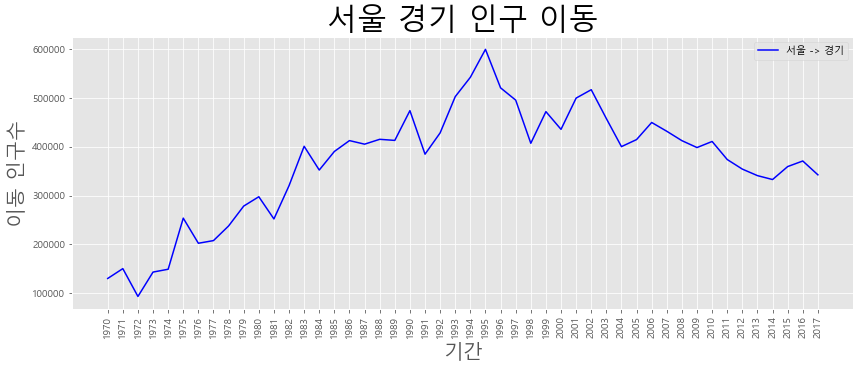

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(sr_one, c='b')
plt.xticks(size=10, rotation='vertical')
plt.title('서울 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
l = plt.legend(labels=['서울 -> 경기'], loc='best')
for text in l.get_texts():
    text.set_color("black")
plt.show()

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

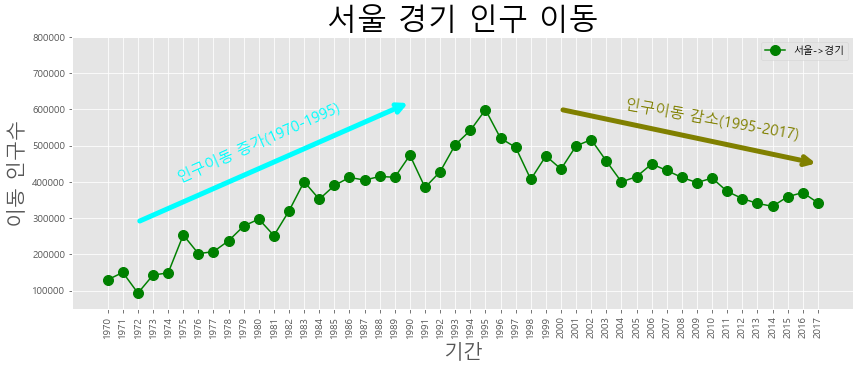

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.ylim(50000, 800000)
plt.plot(sr_one, c='g', marker='o', markersize=10)
plt.annotate('', fontsize=20, xy=(20,620000),
            xytext=(2, 290000), xycoords='data',
            arrowprops=dict(arrowstyle='->',
                    linewidth=5, color='aqua'))
plt.annotate('인구이동 증가(1970-1995)',
             xy=(10, 400000), va='baseline',
            ha='center', fontsize=15, color='aqua',
            rotation=24)
plt.annotate('', fontsize=20, xy=(47,450000),
            xytext=(30, 600000), xycoords='data',
            arrowprops=dict(arrowstyle='->',
                    lw=5, color='olive'))
plt.annotate('인구이동 감소(1995-2017)',
             xy=(40, 520000), va='baseline',
            ha='center', fontsize=15, color='olive',
            rotation=-10)
plt.xticks(size=10, rotation='vertical')
plt.title('서울 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울->경기'],loc='best')
plt.show()

In [9]:
import matplotlib
colors = {}
for name, hex_value in matplotlib.colors.cnames.items():
    colors[name] = hex_value
sr = pd.Series(colors)
print(sr.head(30))

aliceblue         #F0F8FF
antiquewhite      #FAEBD7
aqua              #00FFFF
aquamarine        #7FFFD4
azure             #F0FFFF
beige             #F5F5DC
bisque            #FFE4C4
black             #000000
blanchedalmond    #FFEBCD
blue              #0000FF
blueviolet        #8A2BE2
brown             #A52A2A
burlywood         #DEB887
cadetblue         #5F9EA0
chartreuse        #7FFF00
chocolate         #D2691E
coral             #FF7F50
cornflowerblue    #6495ED
cornsilk          #FFF8DC
crimson           #DC143C
cyan              #00FFFF
darkblue          #00008B
darkcyan          #008B8B
darkgoldenrod     #B8860B
darkgray          #A9A9A9
darkgreen         #006400
darkgrey          #A9A9A9
darkkhaki         #BDB76B
darkmagenta       #8B008B
darkolivegreen    #556B2F
dtype: object


C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


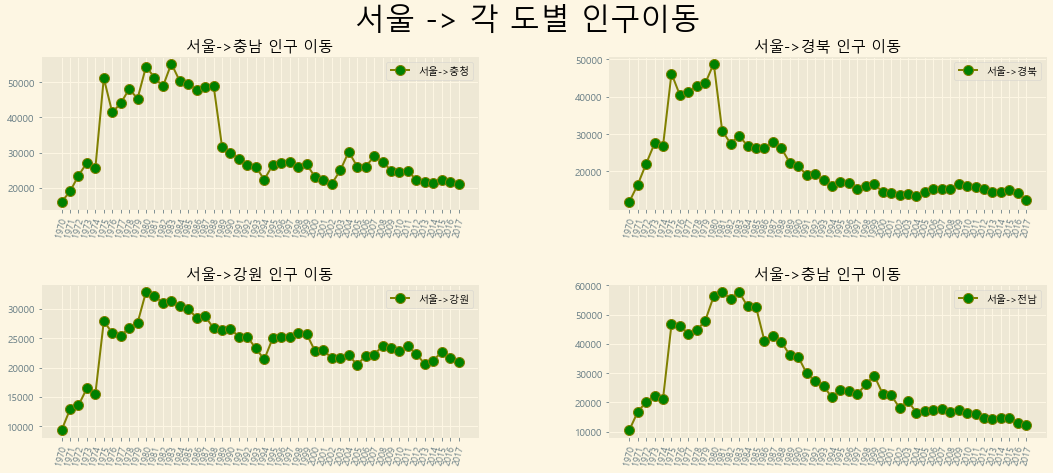

In [10]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도']]
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.plot(col_years,df_4.loc['충청남도'],
        marker='o', markerfacecolor='g', markersize=10,
        color='olive', linewidth=2, label='서울->충청')
ax1.legend(loc='best')
ax1.set_title('서울->충남 인구 이동', size=15)
ax1.set_xticklabels(col_years, rotation=75, size=9)
ax2.plot(col_years,df_4.loc['경상북도'],
        marker='o', markerfacecolor='g', markersize=10,
        color='olive', linewidth=2, label='서울->경북')
ax2.legend(loc='best')
ax2.set_title('서울->경북 인구 이동', size=15)
ax2.set_xticklabels(col_years, rotation=75, size=9)
ax3.plot(col_years,df_4.loc['강원도'],
        marker='o', markerfacecolor='g', markersize=10,
        color='olive', linewidth=2, label='서울->강원')
ax3.legend(loc='best')
ax3.set_title('서울->강원 인구 이동', size=15)
ax3.set_xticklabels(col_years, rotation=75, size=9)
ax4.plot(col_years,df_4.loc['전라남도'],
        marker='o', markerfacecolor='g', markersize=10,
        color='olive', linewidth=2, label='서울->전남')
ax4.legend(loc='best')
ax4.set_title('서울->충남 인구 이동', size=15)
ax4.set_xticklabels(col_years, rotation=75, size=9)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('서울 -> 각 도별 인구이동', size=30)
plt.show()

In [11]:
df_4_T = df_4.T
print(df_4_T.head())

전입지 충청남도 경상북도   강원도 전라남도
1970    15954.0  11868.0   9352.0  10513.0
1971    18943.0  16459.0  12885.0  16755.0
1972    23406.0  22073.0  13561.0  20157.0
1973    27139.0  27531.0  16481.0  22160.0
1974    25509.0  26902.0  15479.0  21314.0


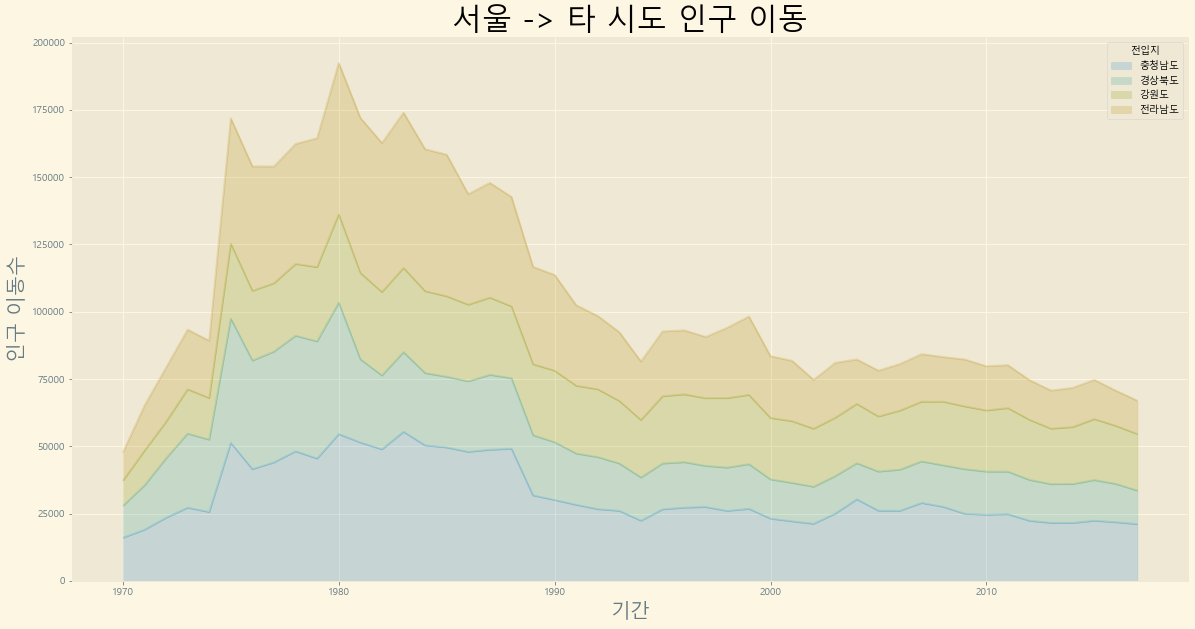

In [12]:
df_4_T.index = df_4_T.index.map(int)
df_4_T.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
plt.title('서울 -> 타 시도 인구 이동',size=30)
plt.ylabel('인구 이동수', size=20)
plt.xlabel('기간', size=20)
plt.show()

In [13]:
titanic = sns.load_dataset('titanic')
print(titanic.head())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

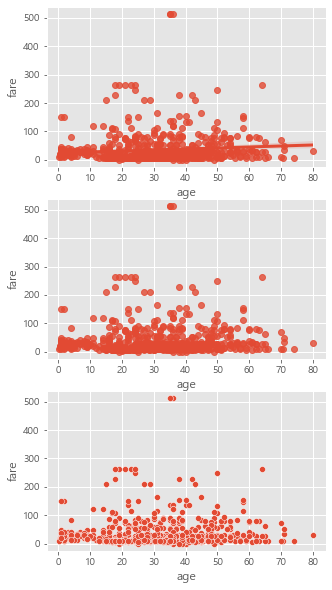

In [14]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.regplot(x='age', y='fare',
           data=titanic, ax=ax1)
sns.regplot(x='age', y='fare',
           data=titanic, ax=ax2, fit_reg=False)
sns.scatterplot(x='age', y='fare',
           data=titanic, ax=ax3)
plt.show()

C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

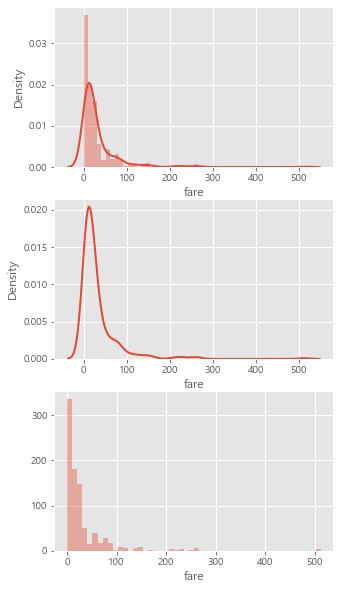

In [15]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.distplot(titanic['fare'],ax=ax1)
sns.distplot(titanic['fare'],hist=False, ax=ax2)
sns.distplot(titanic['fare'],kde=False, ax=ax3)
plt.show()

class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347


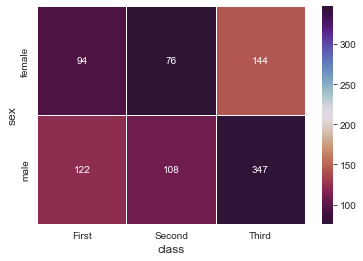

In [16]:
sns.set_style('darkgrid')
table = titanic.pivot_table(index=['sex'], columns=['class'],
                           aggfunc='size')
print(table)
sns.heatmap(table, annot=True, fmt='d', cmap='twilight_shifted_r',
           linewidth=.5, cbar=True)
plt.show()

C:\Users\scolp\.conda\envs\AI_exam_3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


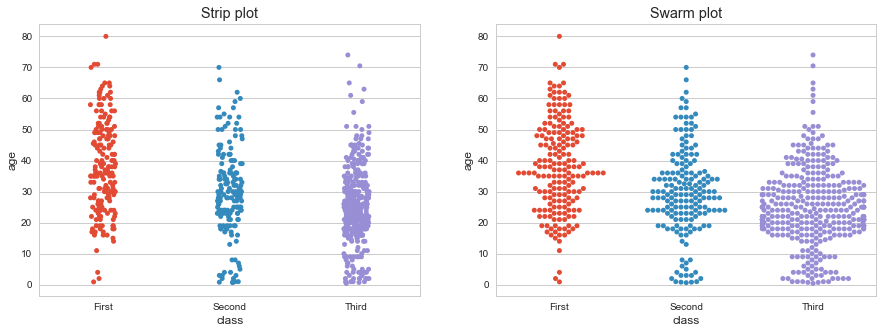

In [17]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(122)
sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)
ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')
plt.show()

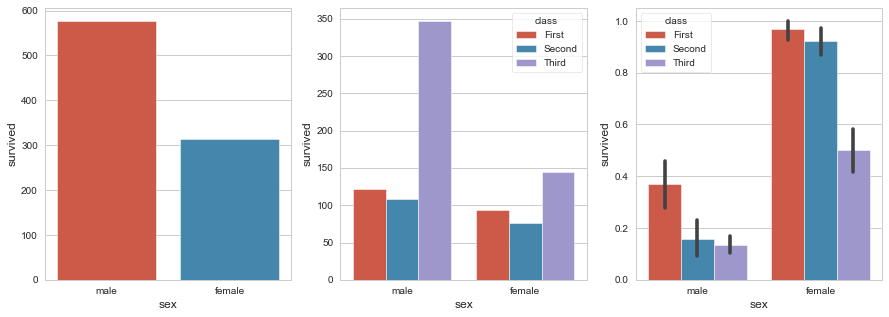

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.barplot(x='sex', y='survived', estimator=len,
           data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived',  estimator=len, hue='class',
           data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=True, #ci = 'sd',
           data=titanic, ax=ax3)
plt.show()

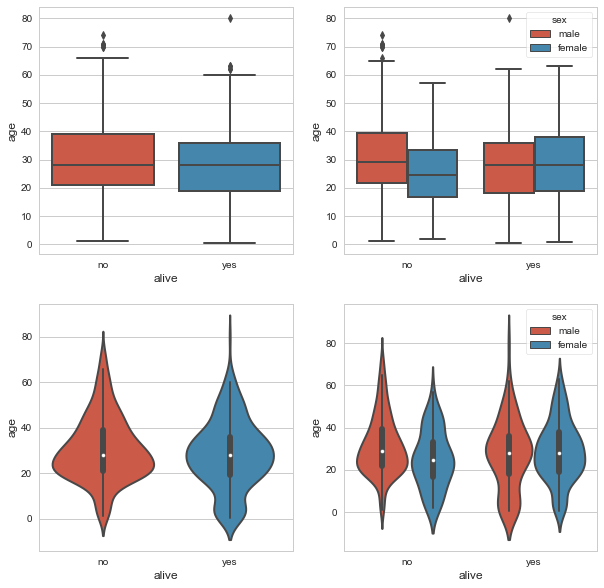

In [23]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.boxplot(x='alive', y='age', data=titanic, ax= ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax= ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax= ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax= ax4)
plt.show()

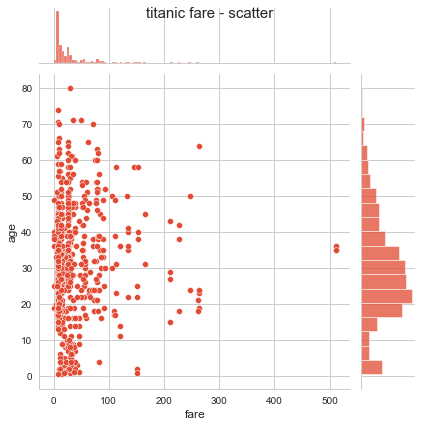

In [24]:
j1 = sns.jointplot(x='fare', y = 'age', data=titanic)
j1.fig.suptitle('titanic fare - scatter', size = 15)
plt.show()

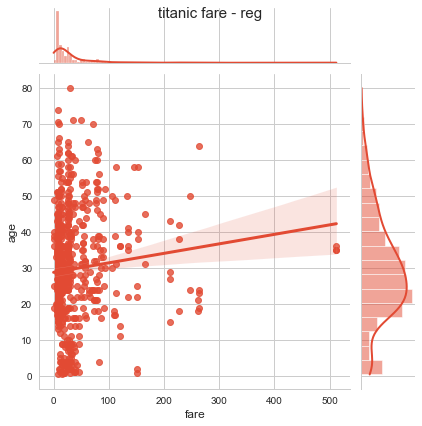

In [25]:
j1 = sns.jointplot(x='fare', y = 'age', kind='reg', data=titanic)
j1.fig.suptitle('titanic fare - reg', size = 15)
plt.show()

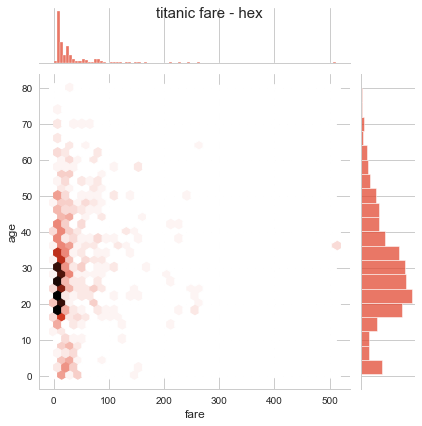

In [27]:
j1 = sns.jointplot(x='fare', y = 'age', kind='hex', data=titanic)
j1.fig.suptitle('titanic fare - hex', size = 15)
plt.show()

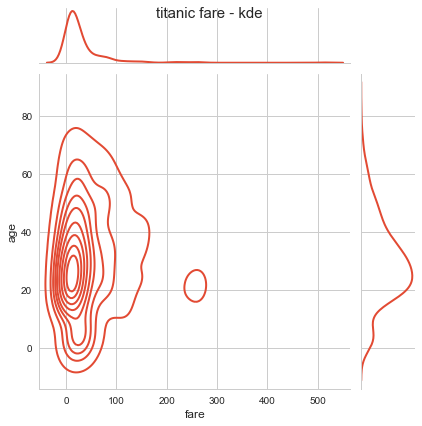

In [29]:
j1 = sns.jointplot(x='fare', y = 'age',kind='kde', data=titanic)
j1.fig.suptitle('titanic fare - kde', size = 15)
plt.show()

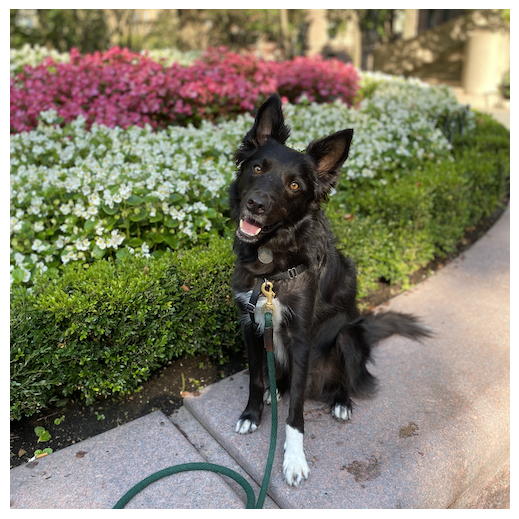

In [33]:
sns.dogplot()
plt.show()